In [1]:
# Import dependencies 
import pandas as pd
import numpy as np
import datetime as dt
import os
from pathlib import Path


%matplotlib inline

In [2]:
# Import CSV Files
path= os.path.join("Resources","algo_returns.csv")
algo= pd.read_csv(path)

path1= os.path.join("Resources", "l_historical.csv")
l= pd.read_csv(path1)

path2= os.path.join("Resources", "otex_historical.csv")
otex= pd.read_csv(path2)

path3= os.path.join("Resources", "shop_historical.csv")
shop= pd.read_csv(path3)

path4= os.path.join("Resources", "sp_tsx_history.csv")
sptsx= pd.read_csv(path4)

path5= os.path.join("Resources", "whale_returns.csv")
whale= pd.read_csv(path5)

In [3]:
# Converting dates to DatetimeIndex
algo['Date']=pd.to_datetime(algo['Date'])
l['Date']=pd.to_datetime(l['Date'])
otex['Date']=pd.to_datetime(otex['Date'])
shop['Date']=pd.to_datetime(shop['Date'])
whale['Date']=pd.to_datetime(whale['Date'])
sptsx['Date']=pd.to_datetime(sptsx['Date'])

In [4]:
# Counting nulls
print(len(algo))
print(len(l))
print(len(otex))
print(len(shop))
print(len(whale))
print(len(sptsx))

1241
501
501
501
1060
1818


In [5]:
# Length if nulls were dropped
print(len(algo.dropna()))
print(len(l.dropna()))
print(len(otex.dropna()))
print(len(shop.dropna()))
print(len(whale.dropna()))
print(len(sptsx.dropna()))

1235
501
501
501
1059
1818


In [6]:
# Dropping null values 
algo.dropna(inplace=True)
l.dropna(inplace=True)
otex.dropna(inplace=True)
shop.dropna(inplace=True)
whale.dropna(inplace=True)
sptsx.dropna(inplace=True)

In [7]:
# Confirming nulls are dropped
print(len(algo))
print(len(l))
print(len(otex))
print(len(shop))
print(len(whale))
print(len(sptsx))

1235
501
501
501
1059
1818


In [8]:
sptsx

,Date,Close
0,2012-10-01,"$12,370.19"
1,2012-10-02,"$12,391.23"
2,2012-10-03,"$12,359.47"
3,2012-10-04,"$12,447.68"
4,2012-10-05,"$12,418.99"
...,...,...
1813,2019-12-20,"$17,118.44"
1814,2019-12-23,"$17,128.71"
1815,2019-12-24,"$17,180.15"
1816,2019-12-27,"$17,168.21"


In [9]:
sptsx['Close'] = sptsx['Close'].str.replace(',', '')
sptsx['Close'] = sptsx['Close'].str.replace('$', '')

/var/folders/p1/0p7zsrcx2wv9mg_w1vbftmp00000gn/T/ipykernel_95699/1075030877.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sptsx['Close'] = sptsx['Close'].str.replace('$', '')


In [10]:
sptsx

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99
...,...,...
1813,2019-12-20,17118.44
1814,2019-12-23,17128.71
1815,2019-12-24,17180.15
1816,2019-12-27,17168.21


In [11]:
sptsx['Close'] = sptsx['Close'].astype(float, errors = 'raise')
sptsx.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [12]:
sptsx['Return']=sptsx['Close'].pct_change()
sptsx

,Date,Close,Return
0,2012-10-01,12370.19,NaN
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305
...,...,...,...
1813,2019-12-20,17118.44,0.003188
1814,2019-12-23,17128.71,0.000600
1815,2019-12-24,17180.15,0.003003
1816,2019-12-27,17168.21,-0.000695


In [13]:
print(len(sptsx))
print(len(sptsx.dropna()))

1818
1817


In [14]:
sptsx.dropna(inplace=True)

In [15]:
sptsx

,Date,Close,Return
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305
5,2012-10-09,12273.57,-0.011709
...,...,...,...
1813,2019-12-20,17118.44,0.003188
1814,2019-12-23,17128.71,0.000600
1815,2019-12-24,17180.15,0.003003
1816,2019-12-27,17168.21,-0.000695


In [16]:
sptsx.rename(columns={"Return":"SPTSX60"},inplace=True)
sptsx

,Date,Close,SPTSX60
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305
5,2012-10-09,12273.57,-0.011709
...,...,...,...
1813,2019-12-20,17118.44,0.003188
1814,2019-12-23,17128.71,0.000600
1815,2019-12-24,17180.15,0.003003
1816,2019-12-27,17168.21,-0.000695


In [17]:
# Merge Whale and Algo dataframes
whalgo=pd.merge(whale,algo,how='inner', left_on=whale.Date, right_on= algo.Date)
whalgo

,key_0,Date_x,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date_y,Algo 1,Algo 2
0,2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2015-03-03,-0.001942,-0.000949
1,2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2015-03-04,-0.008589,0.002416
2,2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726,2015-03-05,-0.000955,0.004323
3,2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2015-03-06,-0.004957,-0.011460
4,2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652,2015-03-09,-0.005447,0.001303
...,...,...,...,...,...,...,...,...,...
1044,2019-04-25,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,2019-04-25,0.000682,-0.007247
1045,2019-04-26,2019-04-26,0.008149,0.009162,0.012355,0.010434,2019-04-26,0.002981,0.005256
1046,2019-04-29,2019-04-29,0.001254,0.002719,0.006251,0.005223,2019-04-29,0.005208,0.002829
1047,2019-04-30,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,2019-04-30,-0.002944,-0.001570


In [18]:
whalgo.drop(columns=['key_0','Date_y'],inplace=True)
whalgo=whalgo.set_index(['Date_x'])

In [19]:
whalgo.index.names = ['Date']
whalgo

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829


In [20]:
# Merge Whalgo DF with SPTSX DF
alldata=pd.merge(whalgo,sptsx,how='inner', left_on=whalgo.index, right_on= sptsx.Date)
alldata

,key_0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Date,Close,SPTSX60
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2015-03-03,15133.85,-0.008530
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2015-03-04,15082.84,-0.003371
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2015-03-05,15103.11,0.001344
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2015-03-06,14952.50,-0.009972
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2015-03-09,14854.49,-0.006555
...,...,...,...,...,...,...,...,...,...,...
1024,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,2019-04-25,16576.10,-0.000628
1025,2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,2019-04-26,16613.46,0.002254
1026,2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,2019-04-29,16600.37,-0.000788
1027,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,2019-04-30,16580.73,-0.001183


In [21]:
alldata.drop(columns=['key_0','Close'],inplace=True)
alldata=alldata.set_index(['Date'])

In [22]:
alldata

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


<AxesSubplot:xlabel='Date'>

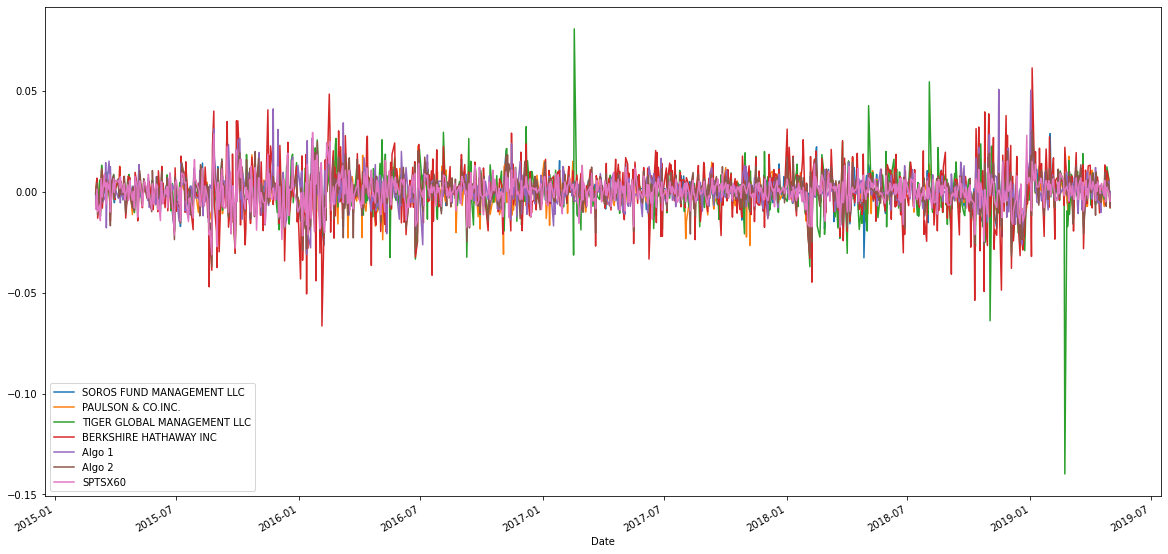

In [23]:
alldata.plot(figsize=(20,10))

In [24]:
# Calculate cumulative returns
cumulative=(1+alldata).cumprod()
cumulative

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX60
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


<AxesSubplot:xlabel='Date'>

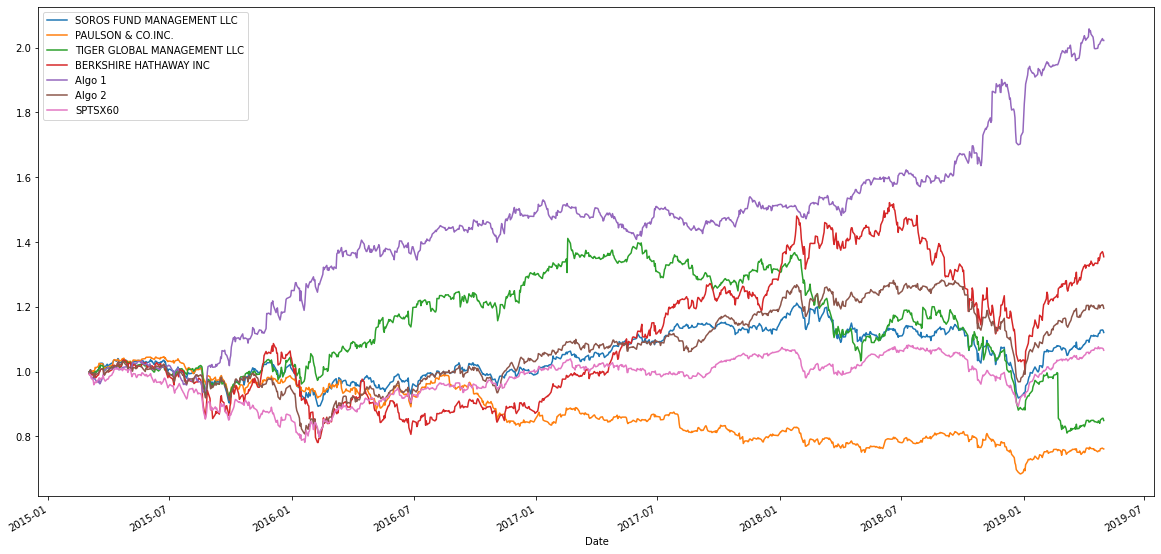

In [25]:
cumulative.plot(figsize=(20,10))

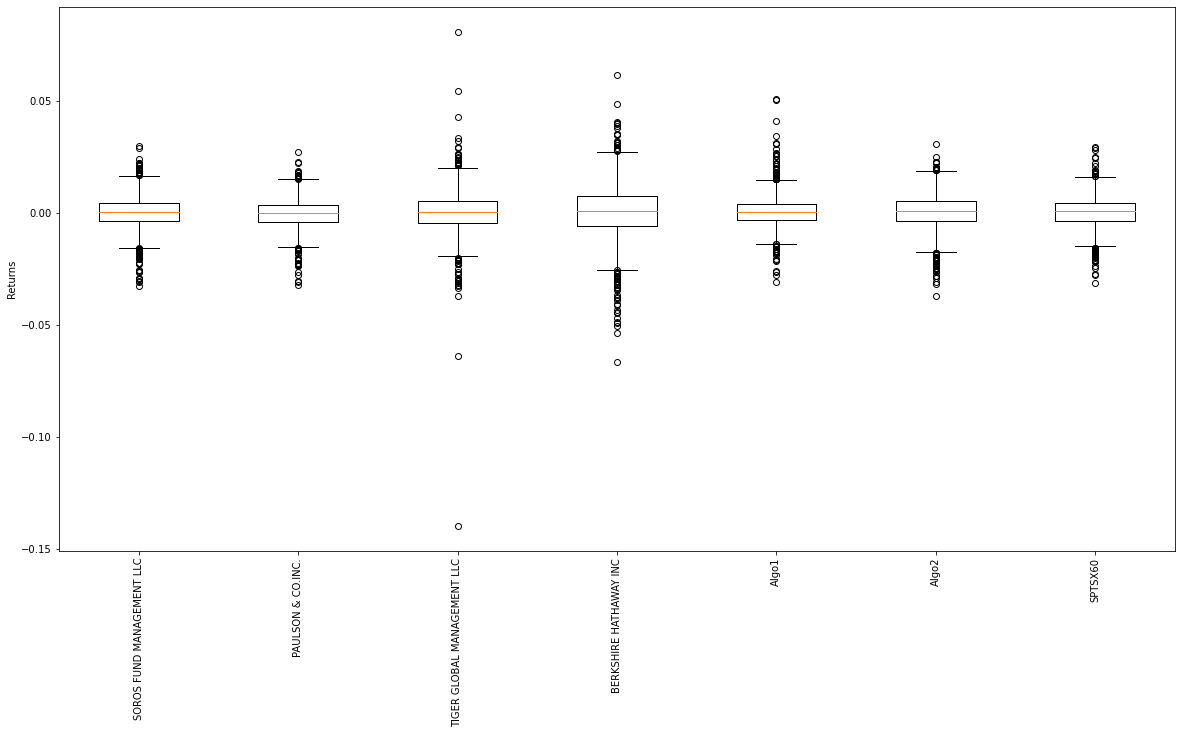

In [26]:
import matplotlib.pyplot as plt
data = alldata
fig = plt.figure(figsize =(20, 10))
plt.ylabel("Returns")
plt.boxplot(data)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', "BERKSHIRE HATHAWAY INC", "Algo1", "Algo2", "SPTSX60"], rotation=90)
plt.show()

In [27]:
allportstd=alldata.std()
allportstd

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SPTSX60                        0.007034
dtype: float64

In [28]:
volatility = np.sqrt(alldata.std() * np.sqrt(252))
volatility

SOROS FUND MANAGEMENT LLC      0.352504
PAULSON & CO.INC.              0.332928
TIGER GLOBAL MANAGEMENT LLC    0.415643
BERKSHIRE HATHAWAY INC         0.451219
Algo 1                         0.347088
Algo 2                         0.363561
SPTSX60                        0.334162
dtype: float64

<AxesSubplot:xlabel='Date'>

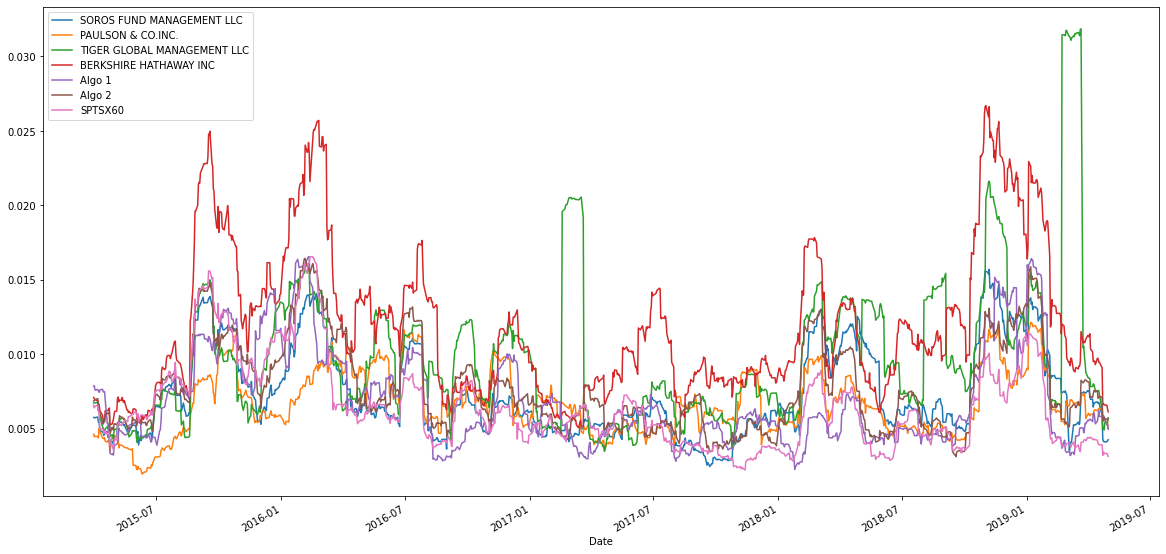

In [29]:
alldata.rolling(window=21).std().plot(figsize=(20,10))

In [30]:
# Calculate correlation
corr=alldata.corr()
corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SPTSX60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

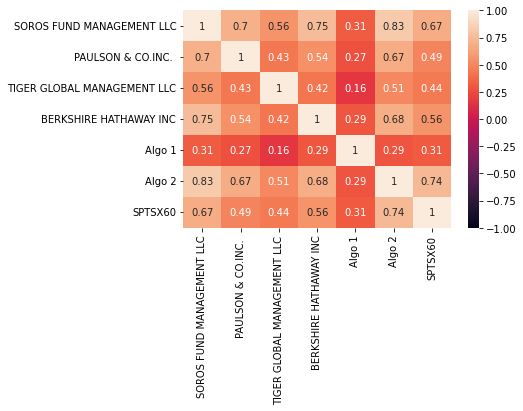

In [31]:
import seaborn as sns
%matplotlib inline
sns.heatmap(corr, vmin=-1, vmax=1, annot=True) 

In [32]:
covariance=alldata['SOROS FUND MANAGEMENT LLC'].cov(alldata['SPTSX60'])
covariance

3.710689907855224e-05

In [33]:
variance=alldata['SPTSX60'].var()
variance

4.9479515915131015e-05

In [34]:
beta=covariance/variance
beta

0.7499446668435334

In [35]:
rolling_covariance=alldata['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(alldata['SPTSX60'])
rolling_covariance.dropna(inplace=True)
rolling_covariance

Date
2015-05-28    0.000020
2015-05-29    0.000020
2015-06-01    0.000020
2015-06-02    0.000020
2015-06-03    0.000019
                ...   
2019-04-25    0.000014
2019-04-26    0.000014
2019-04-29    0.000013
2019-04-30    0.000013
2019-05-01    0.000014
Length: 970, dtype: float64

In [36]:
rolling_variance=alldata['SPTSX60'].rolling(window=30).var()
rolling_variance.dropna(inplace=True)
rolling_variance

Date
2015-04-14    0.000037
2015-04-15    0.000034
2015-04-16    0.000034
2015-04-17    0.000035
2015-04-20    0.000031
                ...   
2019-04-25    0.000016
2019-04-26    0.000016
2019-04-29    0.000015
2019-04-30    0.000014
2019-05-01    0.000015
Name: SPTSX60, Length: 1000, dtype: float64

In [37]:
rolling_beta=rolling_covariance/rolling_variance
rolling_beta.dropna(inplace=True)
rolling_beta

Date
2015-05-28    0.683454
2015-05-29    0.676498
2015-06-01    0.674486
2015-06-02    0.670595
2015-06-03    0.626884
                ...   
2019-04-25    0.841590
2019-04-26    0.888380
2019-04-29    0.818425
2019-04-30    0.928000
2019-05-01    0.964550
Length: 970, dtype: float64

<AxesSubplot:title={'center':'Rolling 60 day data'}, xlabel='Date'>

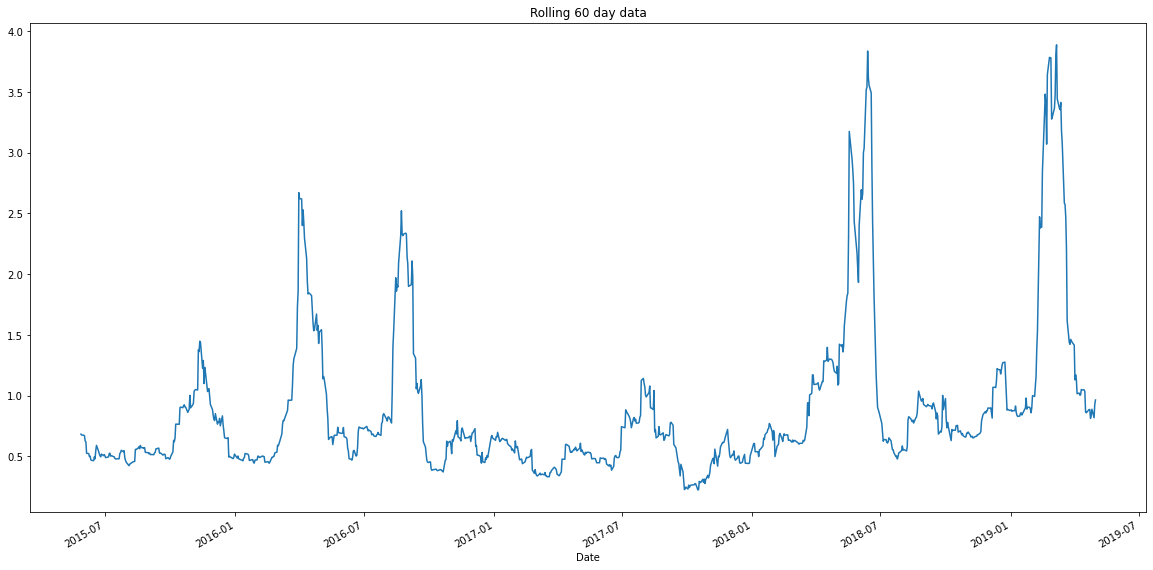

In [38]:
rolling_beta.plot(figsize=(20,10),title= 'Rolling 60 day data')

In [39]:
# Calculate EWM
times=alldata.index
alldata.ewm(halflife='21 days', times=pd.DatetimeIndex(times)).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002402,0.004092,0.002878,0.005946,0.004466,0.002412,0.004709
2015-03-06,0.006921,0.004706,0.006015,0.011558,0.003111,0.009297,0.006229
2015-03-09,0.005209,0.004450,0.007513,0.008177,0.002268,0.007368,0.004271
...,...,...,...,...,...,...,...
2019-04-25,0.003274,0.003123,0.004658,0.007608,0.002693,0.006968,0.003984
2019-04-26,0.004846,0.006305,0.009988,0.007244,0.002251,0.006864,0.003386
2019-04-29,0.004016,0.004568,0.007129,0.005179,0.002528,0.004937,0.002566


In [40]:
means=alldata.mean()
means

SOROS FUND MANAGEMENT LLC      0.000141
PAULSON & CO.INC.             -0.000241
TIGER GLOBAL MANAGEMENT LLC   -0.000099
BERKSHIRE HATHAWAY INC         0.000377
Algo 1                         0.000713
Algo 2                         0.000208
SPTSX60                        0.000087
dtype: float64

In [41]:
stdvs=alldata.std()
stdvs

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SPTSX60                        0.007034
dtype: float64

In [42]:
sharpe_ratios= alldata.mean()*252/(allportstd*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SPTSX60                        0.195550
dtype: float64

In [43]:
listoffunds=['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','SPTSX60']

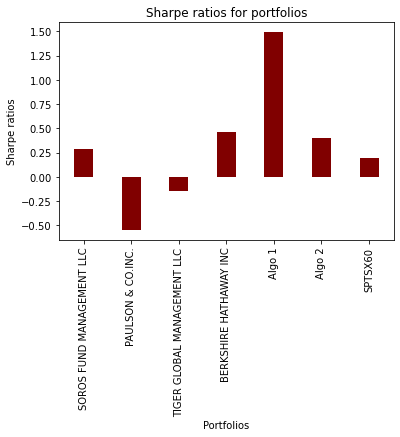

In [44]:
plt.bar(listoffunds, sharpe_ratios, color ='maroon',
        width = 0.4)
plt.xlabel("Portfolios")
plt.xticks(rotation=90)
plt.ylabel("Sharpe ratios")
plt.title("Sharpe ratios for portfolios")
plt.show()

### Custom Portfolio

In [45]:
# Find max date in alldata df
alldata.index.max()

Timestamp('2019-05-01 00:00:00')

In [46]:
# Find min date in alldata df
alldata.index.min()

Timestamp('2015-03-03 00:00:00')

In [47]:
path6= os.path.join("Resources", "AMZN Prices.csv")
AMZN= pd.read_csv(path6)

path7= os.path.join("Resources", "EBAY Prices - Sheet1.csv")
EBAY= pd.read_csv(path7)

path8= os.path.join("Resources", "NVDA Prices - Sheet1.csv")
NVDA= pd.read_csv(path8)

In [48]:
AMZN['Date']=pd.to_datetime(AMZN['Date'])
EBAY['Date']=pd.to_datetime(EBAY['Date'])
NVDA['Date']=pd.to_datetime(NVDA['Date'])

In [49]:
print(len(AMZN))
print(len(EBAY))
print(len(NVDA))

1048
1048
1048


In [50]:
AMZN.dropna(inplace=True)
EBAY.dropna(inplace=True)
NVDA.dropna(inplace=True)

In [51]:
print(len(AMZN))
print(len(EBAY))
print(len(NVDA))

1048
1048
1048


In [52]:
AMZN=AMZN.set_index(['Date'])

In [53]:
EBAY=EBAY.set_index(['Date'])
NVDA=NVDA.set_index(['Date'])

In [54]:
AMBAY=pd.merge(AMZN,EBAY,how='inner', left_on=AMZN.index, right_on= EBAY.index)
AMBAY.rename(columns={"Close_x":"Amazon"},inplace=True)
AMBAY.rename(columns={"Close_y":"Ebay"},inplace=True)
AMBAY.rename(columns={"key_0":"Date"},inplace=True)
AMBAY=AMBAY.set_index(['Date'])
AMBAY

,Amazon,Ebay
Date,,
2015-03-03,384.61,24.52
2015-03-04,382.72,24.54
2015-03-05,387.83,24.87
2015-03-06,380.09,25.20
2015-03-09,378.56,25.59
...,...,...
2019-04-24,1901.75,38.52
2019-04-25,1902.25,38.11
2019-04-26,1950.63,38.36


In [55]:
alldata2=pd.merge(AMBAY,NVDA,how='inner', left_on=AMBAY.index, right_on= NVDA.index)
alldata2.rename(columns={"Close":"NVDA"},inplace=True)
alldata2.rename(columns={"key_0":"Date"},inplace=True)
alldata2=alldata2.set_index(['Date'])
alldata2

,Amazon,Ebay,NVDA
Date,,,
2015-03-03,384.61,24.52,5.55
2015-03-04,382.72,24.54,5.61
2015-03-05,387.83,24.87,5.72
2015-03-06,380.09,25.20,5.64
2015-03-09,378.56,25.59,5.65
...,...,...,...
2019-04-24,1901.75,38.52,47.79
2019-04-25,1902.25,38.11,46.73
2019-04-26,1950.63,38.36,44.52


In [56]:
Secondportreturns=alldata2.pct_change()
Secondportreturns

,Amazon,Ebay,NVDA
Date,,,
2015-03-03,NaN,NaN,NaN
2015-03-04,-0.004914,0.000816,0.010811
2015-03-05,0.013352,0.013447,0.019608
2015-03-06,-0.019957,0.013269,-0.013986
2015-03-09,-0.004025,0.015476,0.001773
...,...,...,...
2019-04-24,-0.011446,0.050450,0.002517
2019-04-25,0.000263,-0.010644,-0.022180
2019-04-26,0.025433,0.006560,-0.047293


In [57]:
Secondportreturns.dropna(inplace=True)
Secondportreturns

,Amazon,Ebay,NVDA
Date,,,
2015-03-04,-0.004914,0.000816,0.010811
2015-03-05,0.013352,0.013447,0.019608
2015-03-06,-0.019957,0.013269,-0.013986
2015-03-09,-0.004025,0.015476,0.001773
2015-03-10,-0.023906,-0.026182,0.017699
...,...,...,...
2019-04-24,-0.011446,0.050450,0.002517
2019-04-25,0.000263,-0.010644,-0.022180
2019-04-26,0.025433,0.006560,-0.047293


In [58]:
weights=[1/3,1/3,1/3]
weightedreturn=Secondportreturns.dot(weights)
print(weightedreturn)

Date
2015-03-04    0.002237
2015-03-05    0.015469
2015-03-06   -0.006891
2015-03-09    0.004408
2015-03-10   -0.010796
                ...   
2019-04-24    0.013840
2019-04-25   -0.010854
2019-04-26   -0.005100
2019-04-29   -0.000720
2019-04-30    0.005432
Length: 1047, dtype: float64


In [59]:
weightedreturn.info

<bound method Series.info of Date
2015-03-04    0.002237
2015-03-05    0.015469
2015-03-06   -0.006891
2015-03-09    0.004408
2015-03-10   -0.010796
                ...   
2019-04-24    0.013840
2019-04-25   -0.010854
2019-04-26   -0.005100
2019-04-29   -0.000720
2019-04-30    0.005432
Length: 1047, dtype: float64>

In [60]:
# Convert Series object to df to eventually merge with alldata df
custom_df=weightedreturn.to_frame(name="Custom")
custom_df

,Custom
Date,
2015-03-04,0.002237
2015-03-05,0.015469
2015-03-06,-0.006891
2015-03-09,0.004408
2015-03-10,-0.010796
...,...
2019-04-24,0.013840
2019-04-25,-0.010854
2019-04-26,-0.005100


In [61]:
weighted_std=weightedreturn.std()
weighted_std

0.01605480923180865

In [62]:
# Merge to form complete portfolio
completeport=pd.merge(alldata,custom_df,how='inner', left_on=alldata.index, right_on= custom_df.index)
completeport.rename(columns={"key_0":"Date"},inplace=True)
completeport=completeport.set_index(['Date'])
completeport.dropna(inplace=True)
completeport

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX60,Custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.002237
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.015469
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.006891
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.004408
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,-0.010796
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.013840
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.010854
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.005100


In [63]:
complete_port_std=completeport.std()
complete_port_std

SOROS FUND MANAGEMENT LLC      0.007833
PAULSON & CO.INC.              0.006987
TIGER GLOBAL MANAGEMENT LLC    0.010891
BERKSHIRE HATHAWAY INC         0.012834
Algo 1                         0.007596
Algo 2                         0.008331
SPTSX60                        0.007034
Custom                         0.015996
dtype: float64

In [64]:
weighted_return_std=weightedreturn.std()
weighted_return_std

0.01605480923180865

In [65]:
weighted_return_vol = np.sqrt(weightedreturn.std() * np.sqrt(252))
weighted_return_vol

0.5048387816359771

<AxesSubplot:xlabel='Date'>

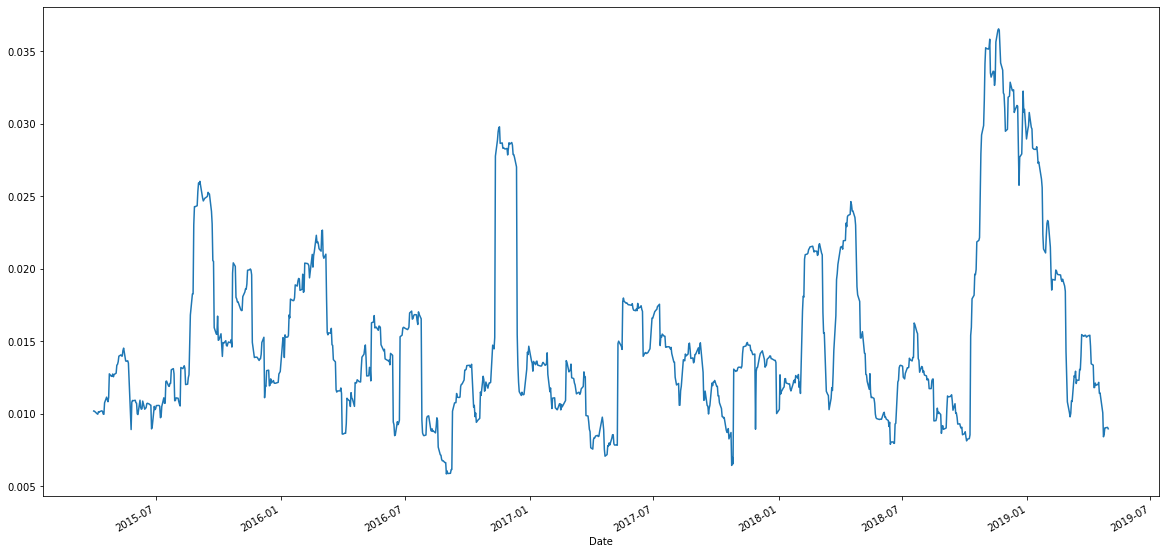

In [66]:
weightedreturn.rolling(window=21).std().plot(figsize=(20,10))

In [67]:
complete_port_corr=completeport.corr()
complete_port_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX60,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.697213,0.560731,0.750091,0.313787,0.826554,0.674055,0.643377
PAULSON & CO.INC.,0.697213,1.000000,0.433111,0.539889,0.266199,0.674220,0.486177,0.456065
TIGER GLOBAL MANAGEMENT LLC,0.560731,0.433111,1.000000,0.423308,0.161217,0.506383,0.440595,0.397434
BERKSHIRE HATHAWAY INC,0.750091,0.539889,0.423308,1.000000,0.289260,0.684485,0.556903,0.681517
Algo 1,0.313787,0.266199,0.161217,0.289260,1.000000,0.285471,0.310121,0.214105
Algo 2,0.826554,0.674220,0.506383,0.684485,0.285471,1.000000,0.737610,0.623281
SPTSX60,0.674055,0.486177,0.440595,0.556903,0.310121,0.737610,1.000000,0.453658
Custom,0.643377,0.456065,0.397434,0.681517,0.214105,0.623281,0.453658,1.000000


<AxesSubplot:>

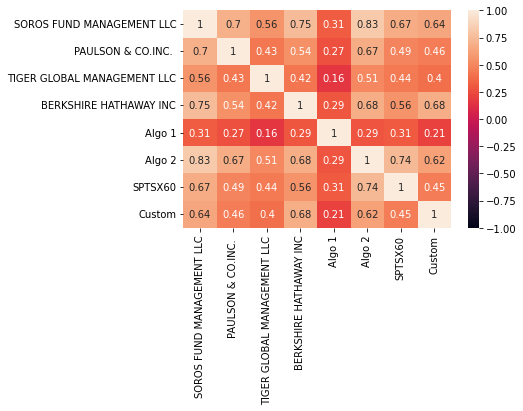

In [68]:
import seaborn as sns
%matplotlib inline
sns.heatmap(complete_port_corr, vmin=-1, vmax=1, annot=True) 

In [69]:
covariance_port_2=weightedreturn.cov(alldata['SPTSX60'])
covariance_port_2

5.104720375968968e-05

In [70]:
variance_2=alldata['SPTSX60'].var()
variance_2

4.9479515915131015e-05

In [71]:
beta2=covariance_port_2/variance_2
beta2

1.031683572799047

In [72]:
rolling_covariance2=weightedreturn.rolling(window=60).cov(alldata['SPTSX60'])
rolling_covariance2.dropna(inplace=True)
rolling_covariance2

Date
2016-03-24    0.000110
2016-03-28    0.000112
2016-03-29    0.000112
2016-03-30    0.000110
2016-03-31    0.000105
                ...   
2019-04-24    0.000019
2019-04-25    0.000022
2019-04-26    0.000022
2019-04-29    0.000021
2019-04-30    0.000020
Length: 147, dtype: float64

In [73]:
rolling_variance2=alldata['SPTSX60'].rolling(window=30).var()
rolling_variance2.dropna(inplace=True)
rolling_variance2

Date
2015-04-14    0.000037
2015-04-15    0.000034
2015-04-16    0.000034
2015-04-17    0.000035
2015-04-20    0.000031
                ...   
2019-04-25    0.000016
2019-04-26    0.000016
2019-04-29    0.000015
2019-04-30    0.000014
2019-05-01    0.000015
Name: SPTSX60, Length: 1000, dtype: float64

In [74]:
rolling_beta2=rolling_covariance2/rolling_variance2
rolling_beta2.dropna(inplace=True)
rolling_beta2

Date
2016-03-24    1.373804
2016-03-28    1.475508
2016-03-29    1.849106
2016-03-30    1.951895
2016-03-31    2.732069
                ...   
2019-04-24    1.188431
2019-04-25    1.349430
2019-04-26    1.397557
2019-04-29    1.362580
2019-04-30    1.415906
Length: 147, dtype: float64

<AxesSubplot:title={'center':'Rolling 60 day data 2'}, xlabel='Date'>

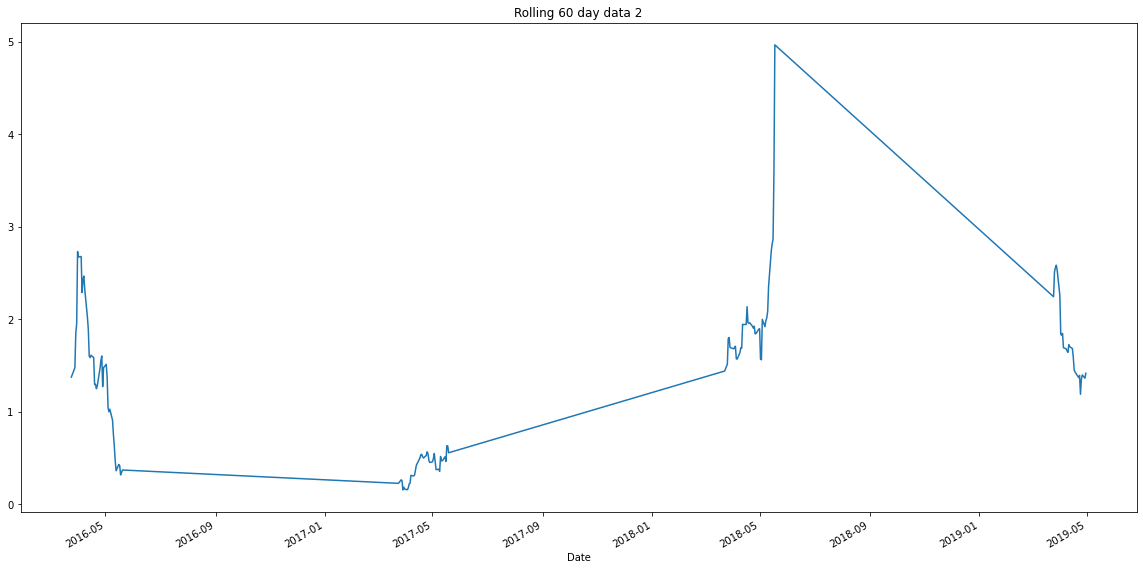

In [75]:
rolling_beta2.plot(figsize=(20,10),title= 'Rolling 60 day data 2')

In [76]:
sharpe_ratio2=(completeport.mean()*252/(complete_port_std*np.sqrt(252)))
sharpe_ratio2

SOROS FUND MANAGEMENT LLC      0.301110
PAULSON & CO.INC.             -0.534272
TIGER GLOBAL MANAGEMENT LLC   -0.132665
BERKSHIRE HATHAWAY INC         0.485005
Algo 1                         1.496819
Algo 2                         0.412780
SPTSX60                        0.225006
Custom                         1.396084
dtype: float64

In [77]:
listoffunds2=['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','SPTSX60','Custom']

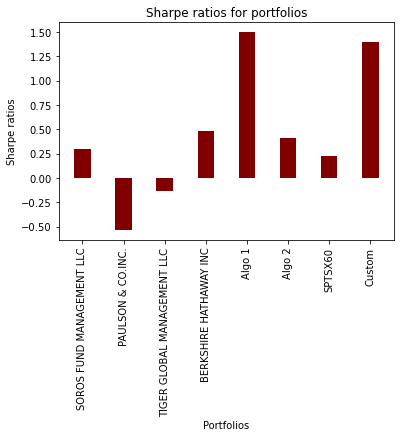

In [78]:
plt.bar(listoffunds2, sharpe_ratio2, color ='maroon',
        width = 0.4)
plt.xlabel("Portfolios")
plt.xticks(rotation=90)
plt.ylabel("Sharpe ratios")
plt.title("Sharpe ratios for portfolios")
plt.show()